✅ Dataset carregado com sucesso: ../data/raw/delivery_time.csv
Dimensões: (2510, 17)

Tipos de Dados:
 delivery_id                 object
distance_km                float64
package_weight_kg          float64
delivery_type               object
vehicle_type                object
traffic_condition           object
weather                     object
time_of_day                 object
day_of_week                 object
driver_experience_years    float64
num_stops                    int64
is_priority                 object
package_fragile             object
delivery_zone               object
customer_rating            float64
fuel_cost                  float64
delivery_time_hours        float64
dtype: object

Estatísticas Descritivas:


,distance_km,package_weight_kg,driver_experience_years,num_stops,customer_rating,fuel_cost,delivery_time_hours
count,2397.000000,2315.000000,2345.000000,2510.000000,2361.000000,2400.000000,2510.000000
mean,16.552603,5.578324,4.870917,2.216733,2.937696,5.508837,19.142442
std,14.916946,6.722003,3.245853,1.988418,0.510197,0.801556,9.045000
min,-9.620000,-3.080000,0.000000,0.000000,1.080000,2.840000,0.500000
25%,8.480000,3.000000,3.000000,1.000000,2.600000,4.970000,12.700000
50%,15.020000,4.970000,4.000000,2.000000,2.940000,5.520000,18.495000
75%,21.980000,6.990000,7.000000,3.000000,3.290000,6.020000,25.060000
max,195.800000,99.080000,36.500000,30.000000,6.490000,8.570000,51.550000



Variáveis Numéricas: ['distance_km', 'package_weight_kg', 'driver_experience_years', 'num_stops', 'customer_rating', 'fuel_cost', 'delivery_time_hours']
Variáveis Categóricas: ['delivery_id', 'delivery_type', 'vehicle_type', 'traffic_condition', 'weather', 'time_of_day', 'day_of_week', 'is_priority', 'package_fragile', 'delivery_zone']
Valores faltantes por coluna:

traffic_condition          255
package_weight_kg          195
driver_experience_years    165
customer_rating            149
distance_km                113
fuel_cost                  110
dtype: int64


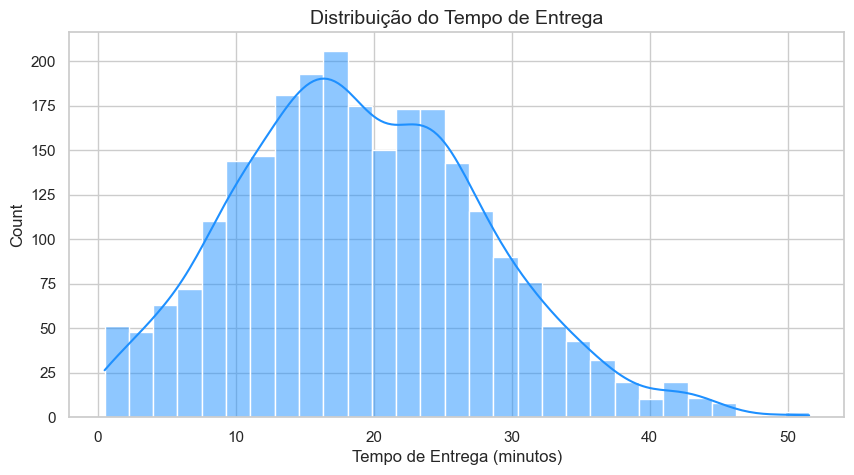

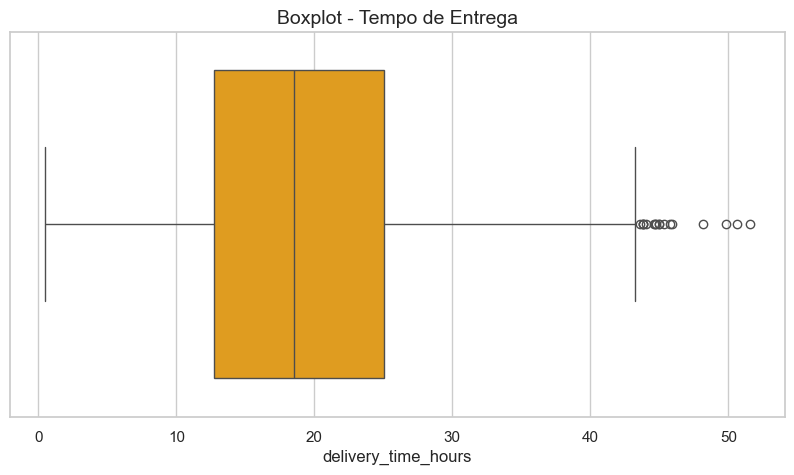


Estatísticas Descritivas da Variável Alvo:


count    2510.000000
mean       19.142442
std         9.045000
min         0.500000
25%        12.700000
50%        18.495000
75%        25.060000
max        51.550000
Name: delivery_time_hours, dtype: float64


Shapiro-Wilk Test: ShapiroResult(statistic=0.991446114317938, pvalue=4.863525029075488e-11)
Distribuição é normal? Não ❌

🔹 distance_km


count    2397.000000
mean       16.552603
std        14.916946
min        -9.620000
25%         8.480000
50%        15.020000
75%        21.980000
max       195.800000
Name: distance_km, dtype: float64

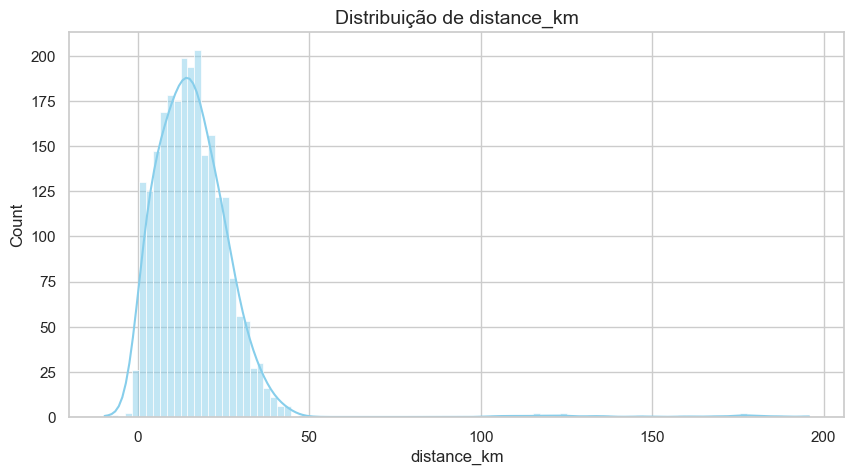

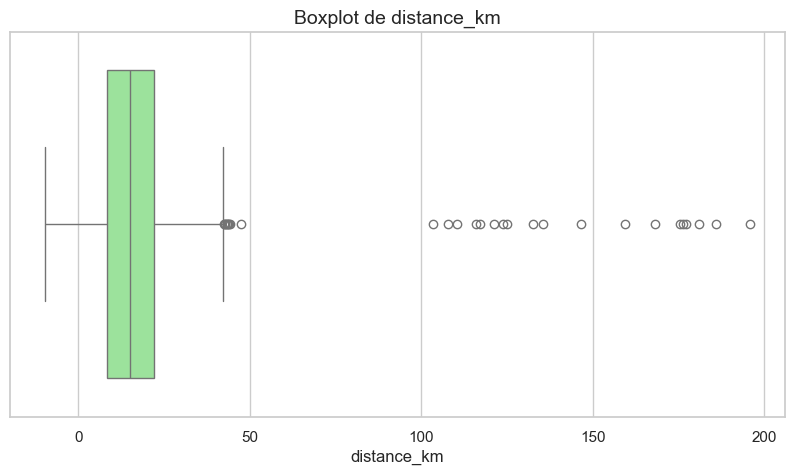

distance_km: 28 outliers encontrados.

🔹 package_weight_kg


count    2315.000000
mean        5.578324
std         6.722003
min        -3.080000
25%         3.000000
50%         4.970000
75%         6.990000
max        99.080000
Name: package_weight_kg, dtype: float64

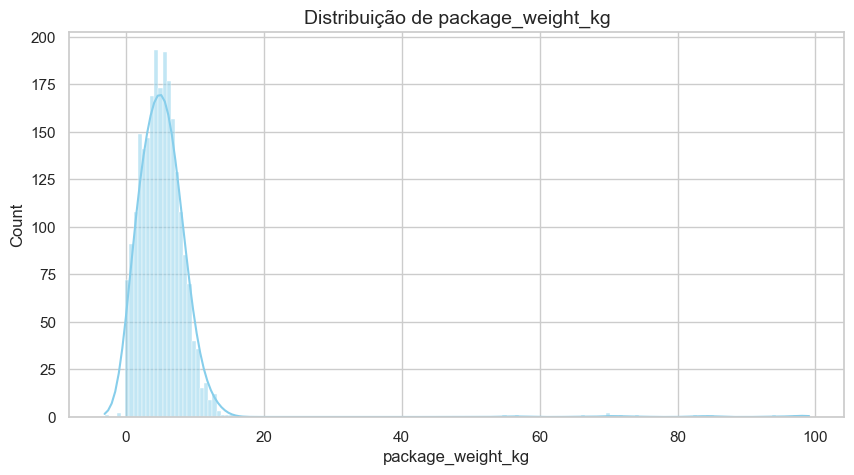

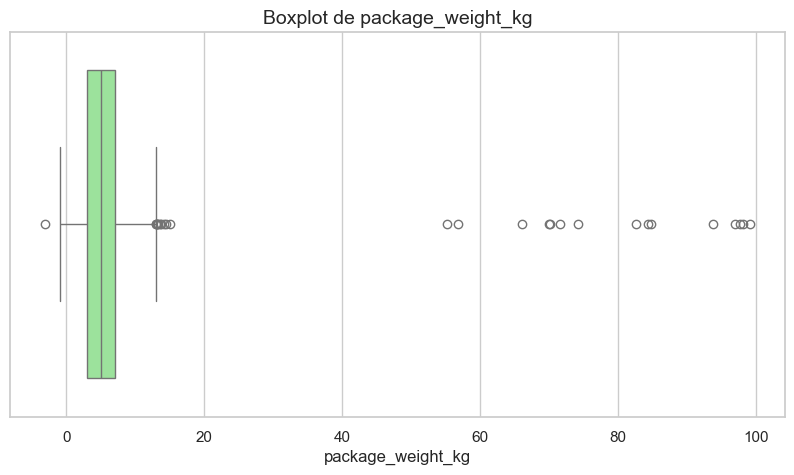

package_weight_kg: 26 outliers encontrados.

🔹 driver_experience_years


count    2345.000000
mean        4.870917
std         3.245853
min         0.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        36.500000
Name: driver_experience_years, dtype: float64

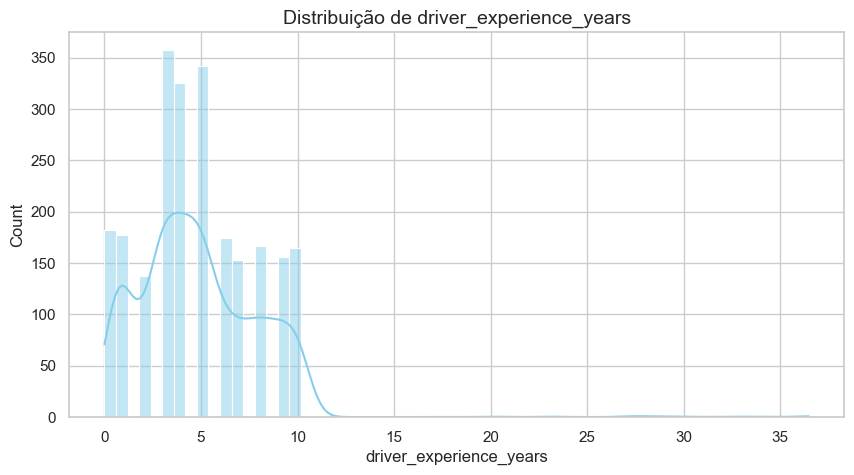

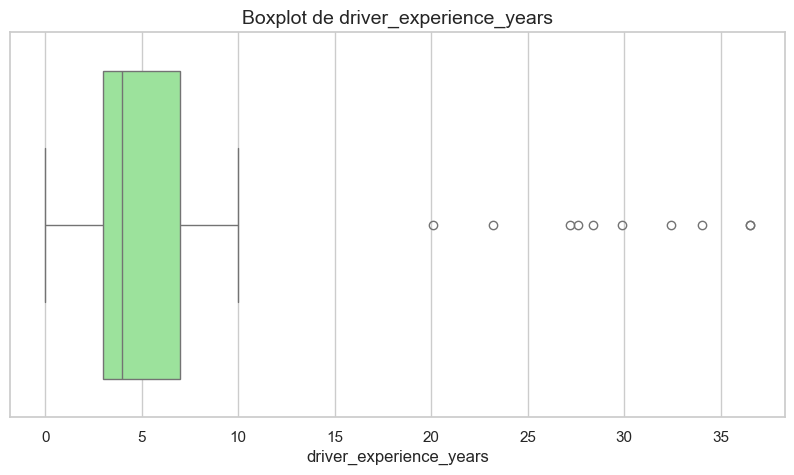

driver_experience_years: 10 outliers encontrados.

🔹 num_stops


count    2510.000000
mean        2.216733
std         1.988418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        30.000000
Name: num_stops, dtype: float64

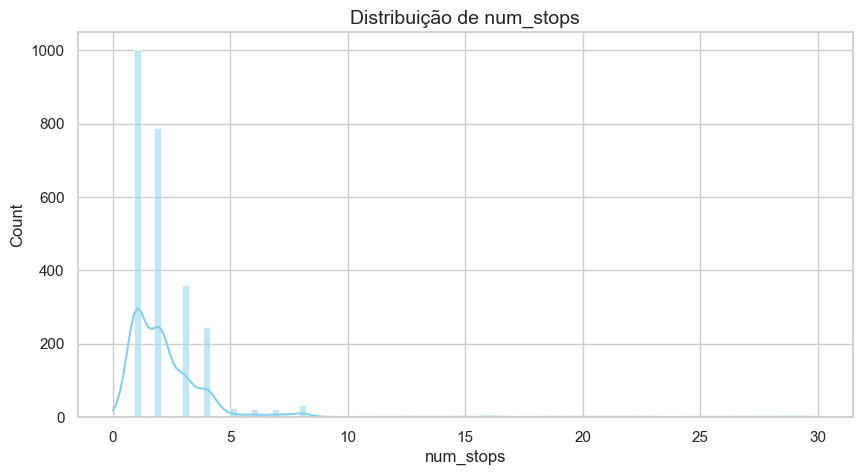

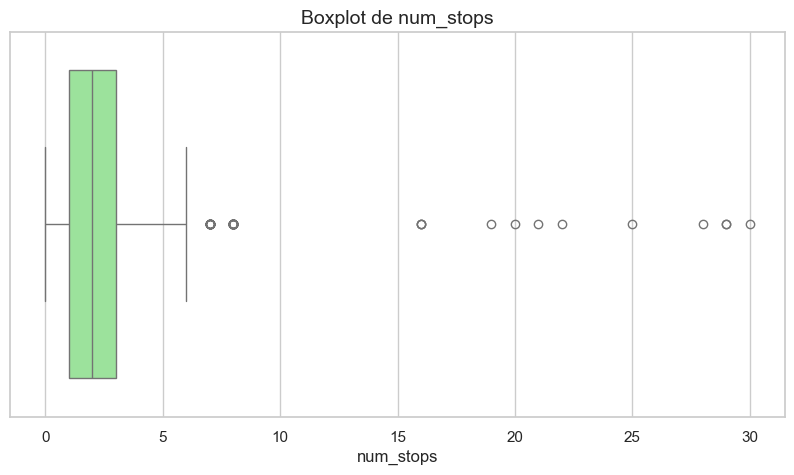

num_stops: 66 outliers encontrados.

🔹 customer_rating


count    2361.000000
mean        2.937696
std         0.510197
min         1.080000
25%         2.600000
50%         2.940000
75%         3.290000
max         6.490000
Name: customer_rating, dtype: float64

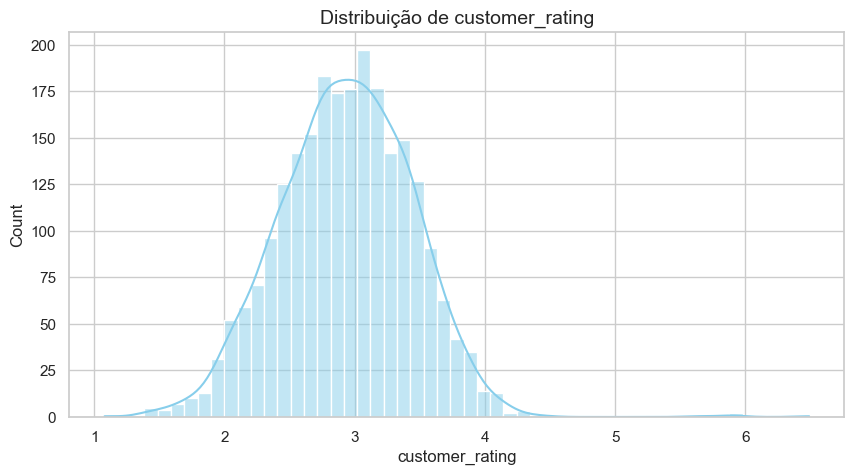

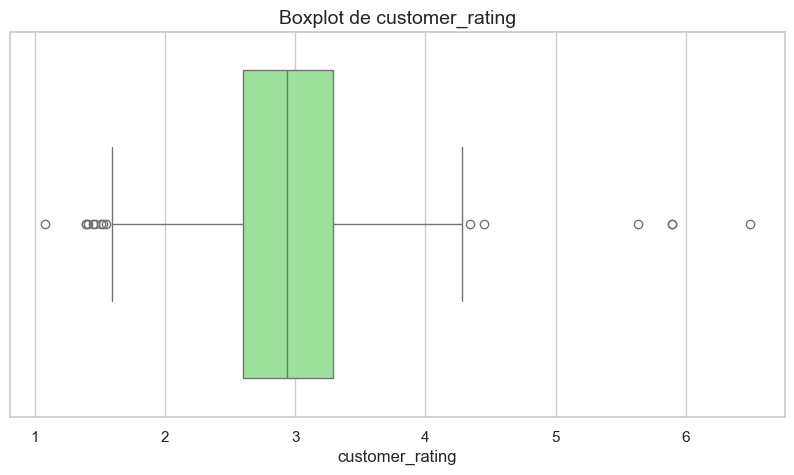

customer_rating: 15 outliers encontrados.

🔹 fuel_cost


count    2400.000000
mean        5.508837
std         0.801556
min         2.840000
25%         4.970000
50%         5.520000
75%         6.020000
max         8.570000
Name: fuel_cost, dtype: float64

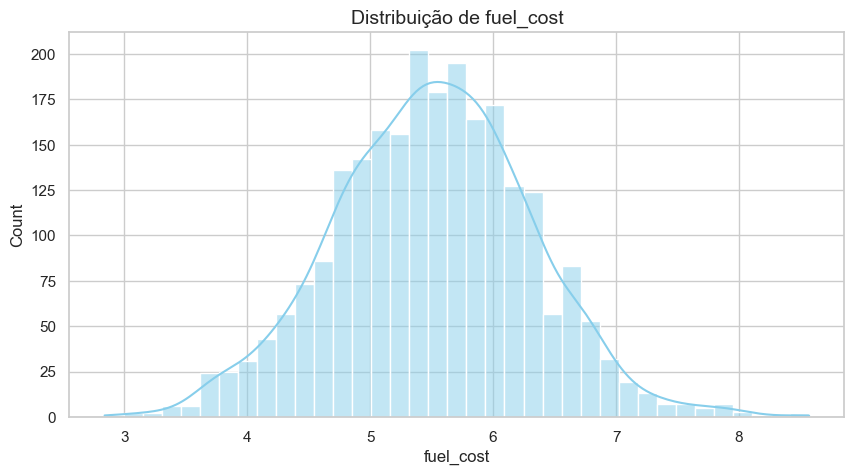

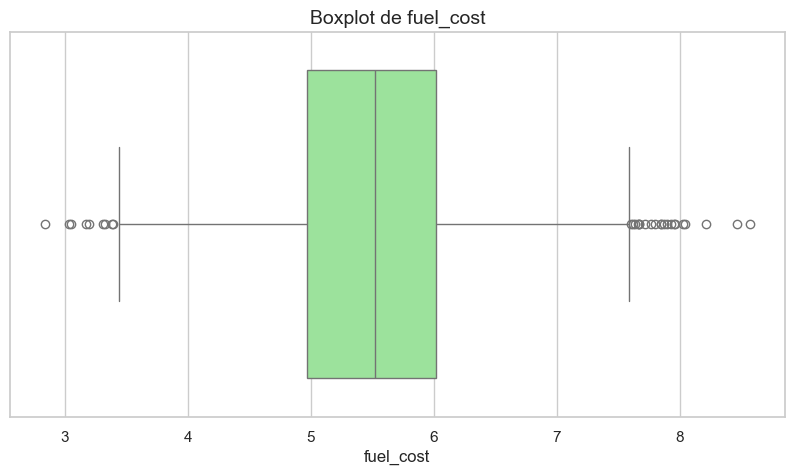

fuel_cost: 30 outliers encontrados.

 delivery_id
delivery_id
DEL00331    1
DEL00178    1
DEL00682    1
DEL00280    1
DEL00052    1
           ..
DEL01043    1
DEL01263    1
DEL01794    1
DEL00554    1
DEL02022    1
Name: count, Length: 2510, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


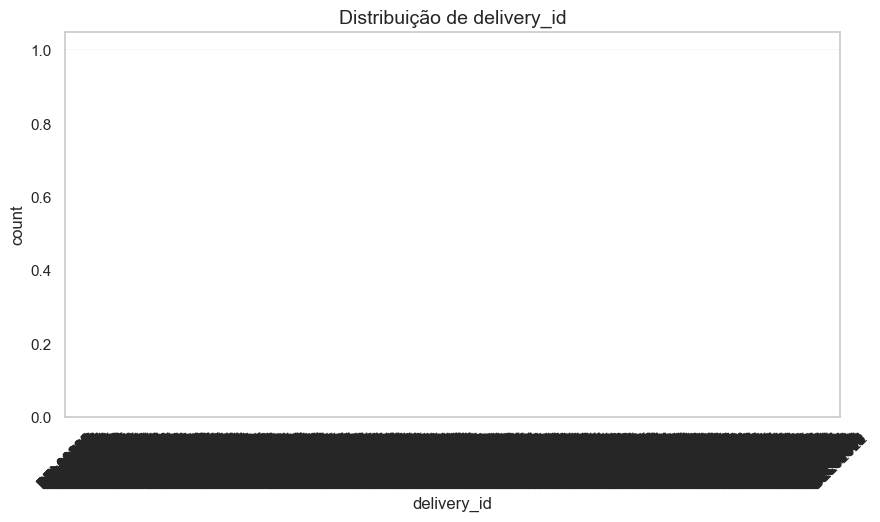


 delivery_type
delivery_type
Standard       1424
Economy         646
Express         405
  Standard       11
  Economy         7
standard          6
economy           6
express           3
  Express         2
Name: count, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


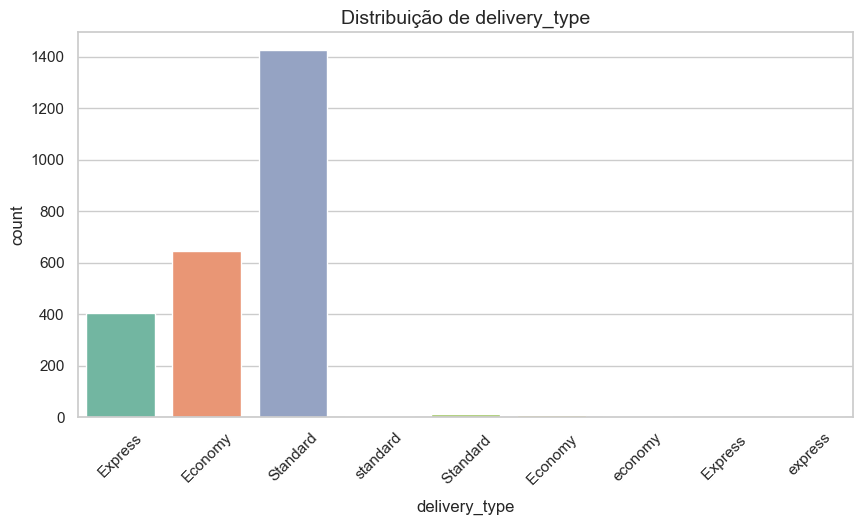


 vehicle_type
vehicle_type
Carro          996
Moto           759
Van            478
Caminhão       242
  Carro         10
  Moto           8
carro            5
moto             5
van              4
  Caminhão       2
caminhão         1
Name: count, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


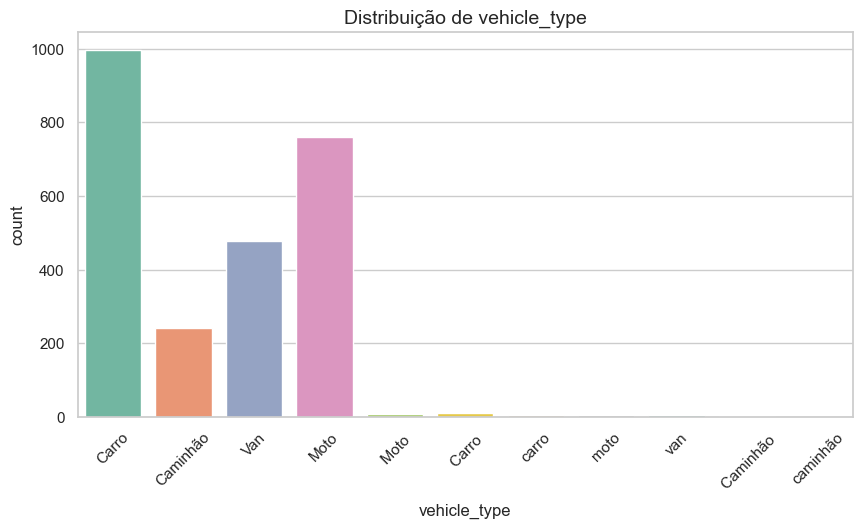


 traffic_condition
traffic_condition
Médio               881
Alto                585
Baixo               547
Congestionado       209
  Alto                7
  Médio               5
baixo                 5
  Baixo               5
alto                  4
médio                 4
congestionado         2
  Congestionado       1
Name: count, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


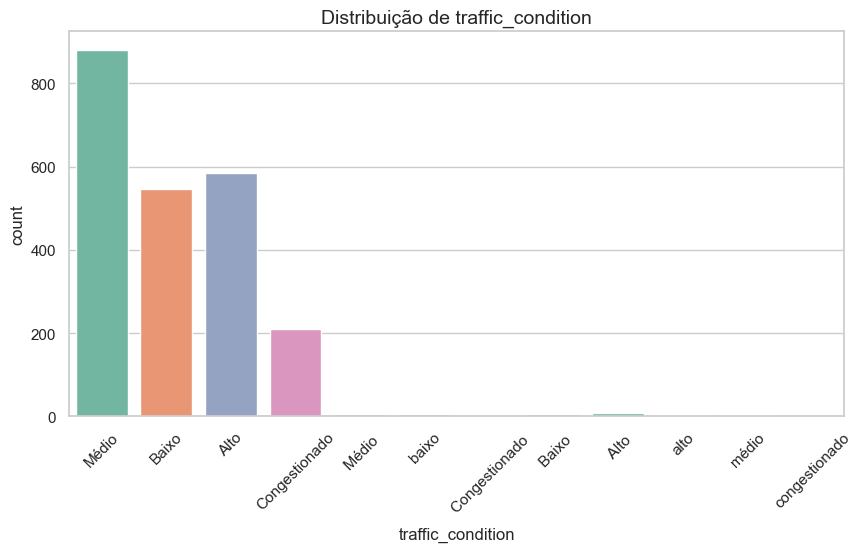


 weather
weather
Ensolarado       1263
Nublado           596
Chuva Leve        356
Chuva Forte       209
Tempestade         52
  Ensolarado       12
  Chuva Leve        6
ensolarado          4
nublado             4
chuva leve          3
chuva forte         3
  nublado           1
  Nublado           1
Name: count, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


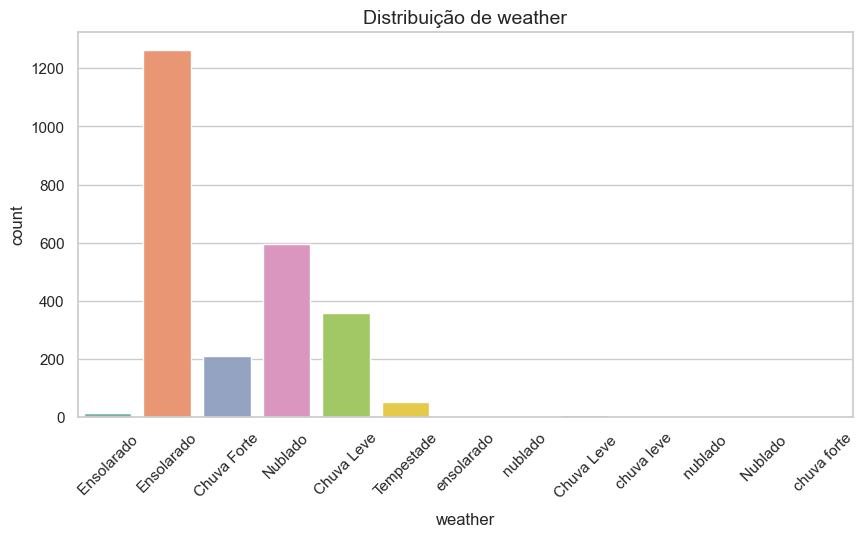


 time_of_day
time_of_day
Tarde        985
Manhã        846
Noite        393
Madrugada    251
  Manhã       10
manhã          7
  Tarde        6
tarde          4
  Noite        4
noite          3
  tarde        1
Name: count, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


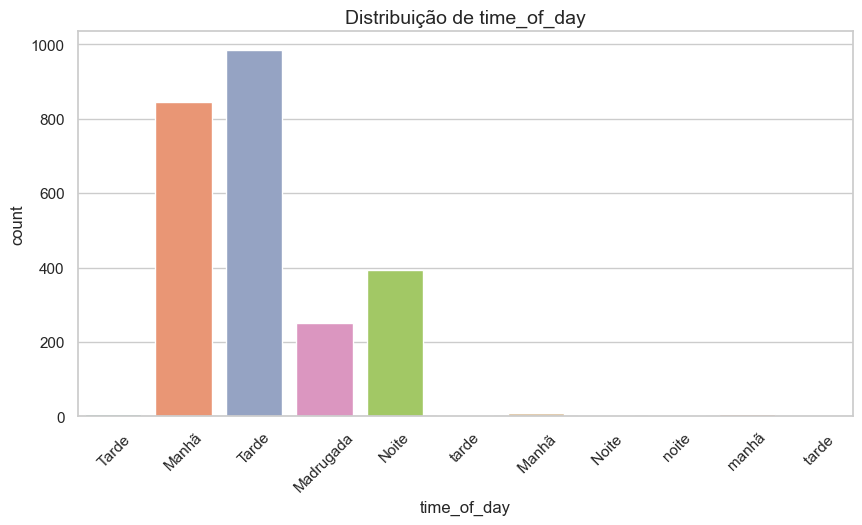


 day_of_week
day_of_week
Seg-Qui       1469
Sexta          500
Sábado         378
Domingo        128
  Seg-Qui       14
seg-qui          9
  Sábado         4
sábado           3
sexta            2
domingo          1
  Domingo        1
  Sexta          1
Name: count, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


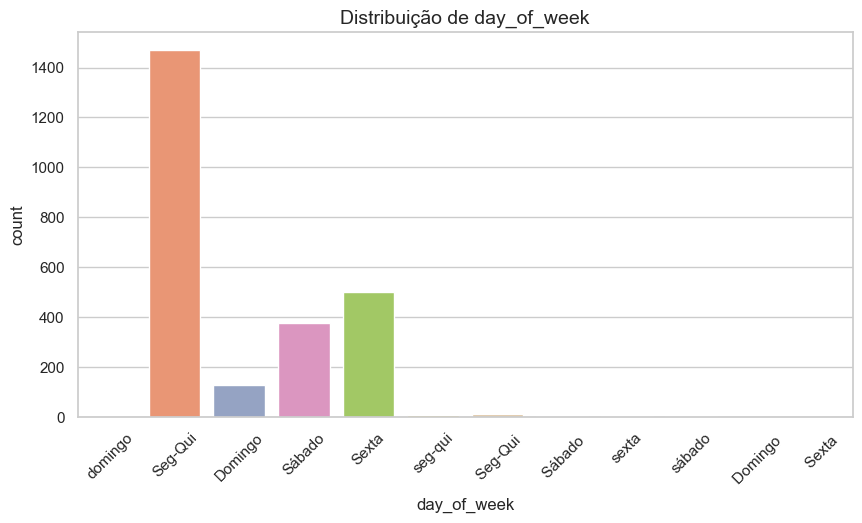


 is_priority
is_priority
No        1820
Yes        654
no          12
  No        12
  Yes        9
yes          3
Name: count, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


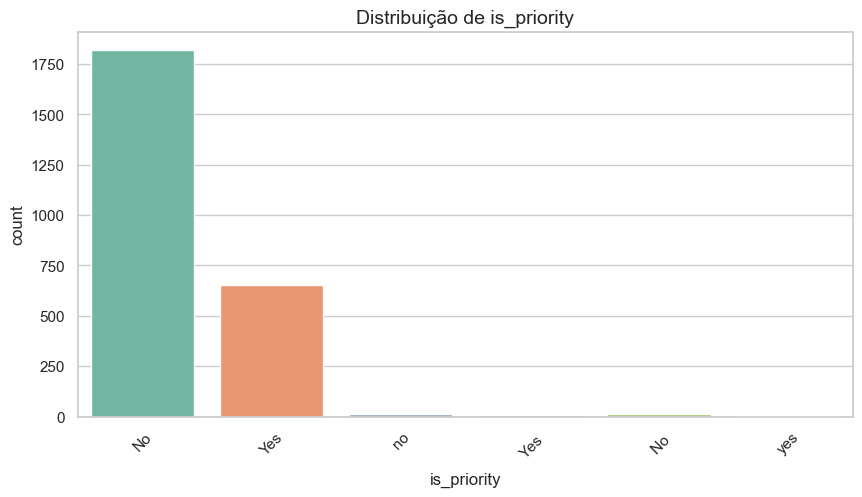


 package_fragile
package_fragile
No        1758
Yes        717
  No        18
no          11
yes          4
  Yes        2
Name: count, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


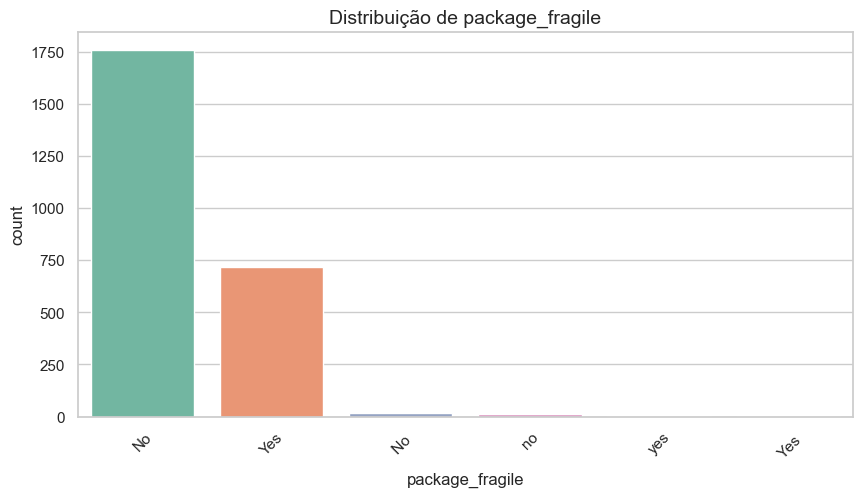


 delivery_zone
delivery_zone
Urbana          1492
Suburbana        719
Rural            264
  Urbana          12
urbana            12
  Suburbana        5
  Rural            3
suburbana          3
Name: count, dtype: int64


C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


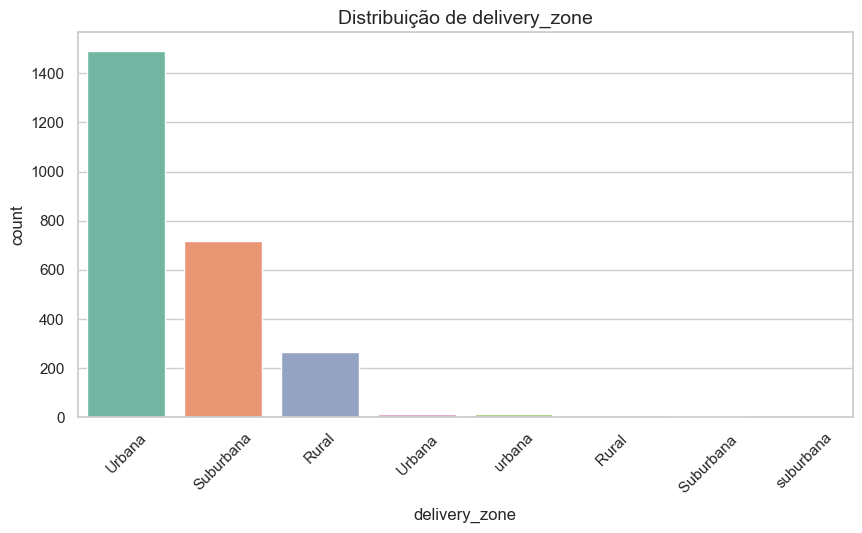

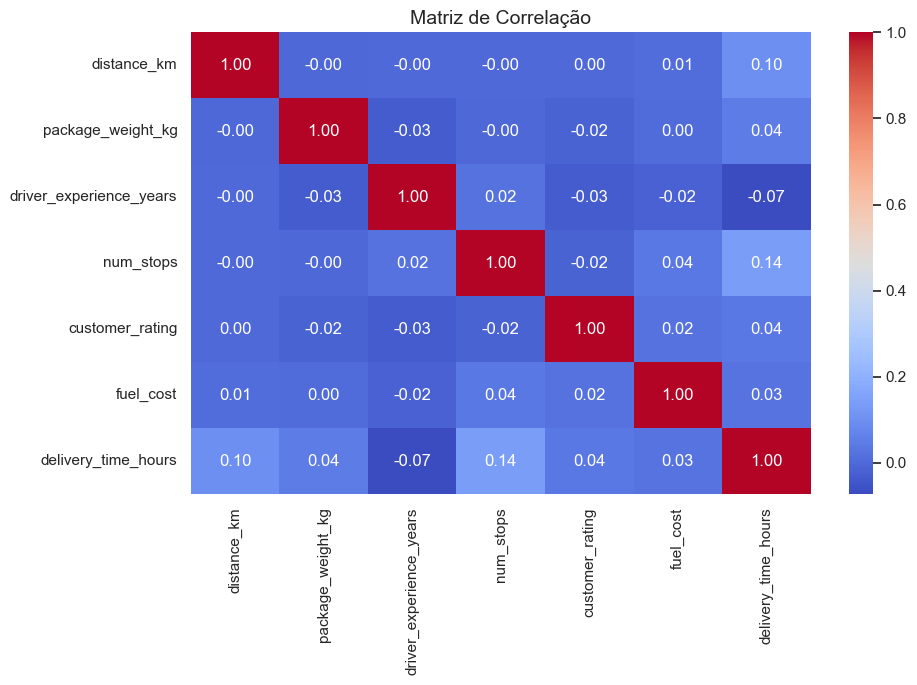

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


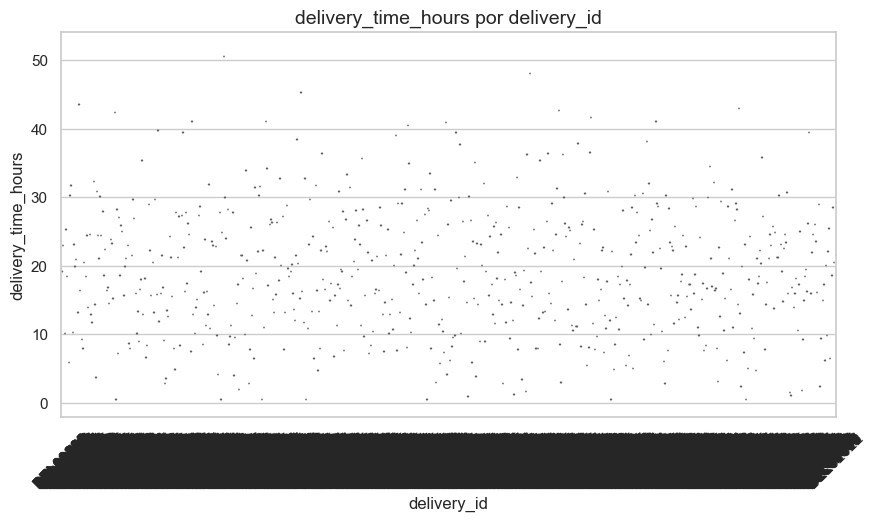

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


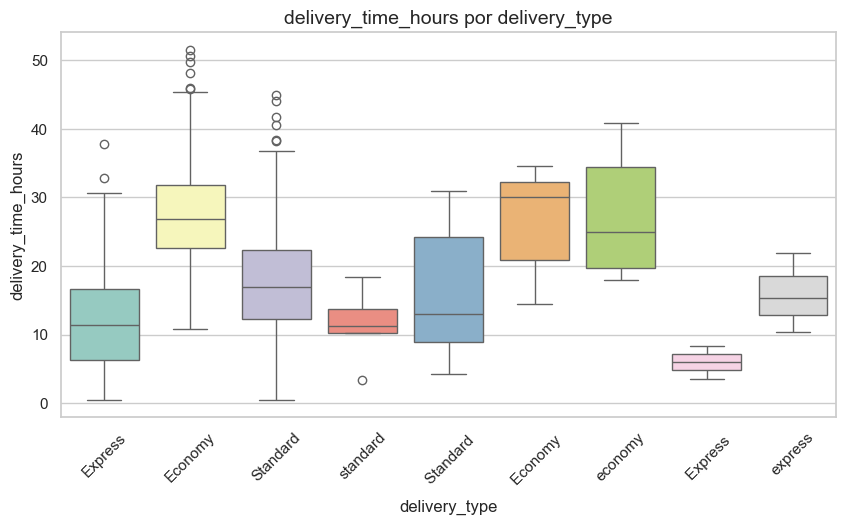

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


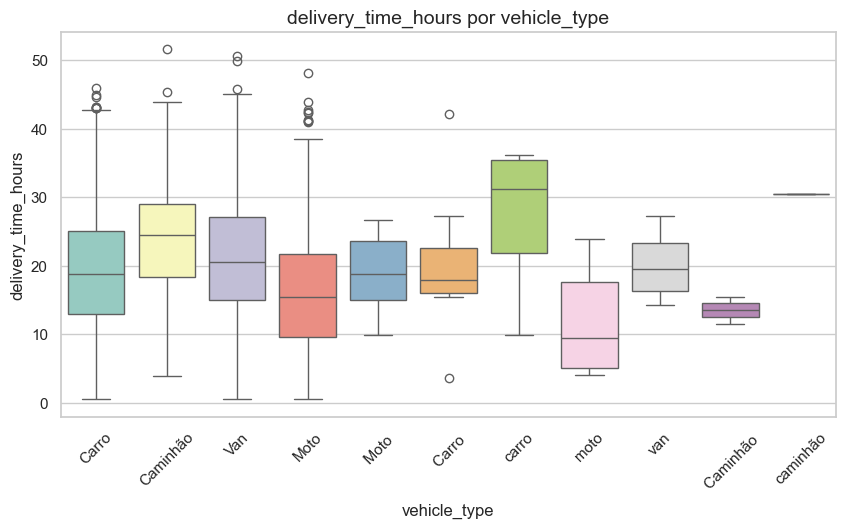

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


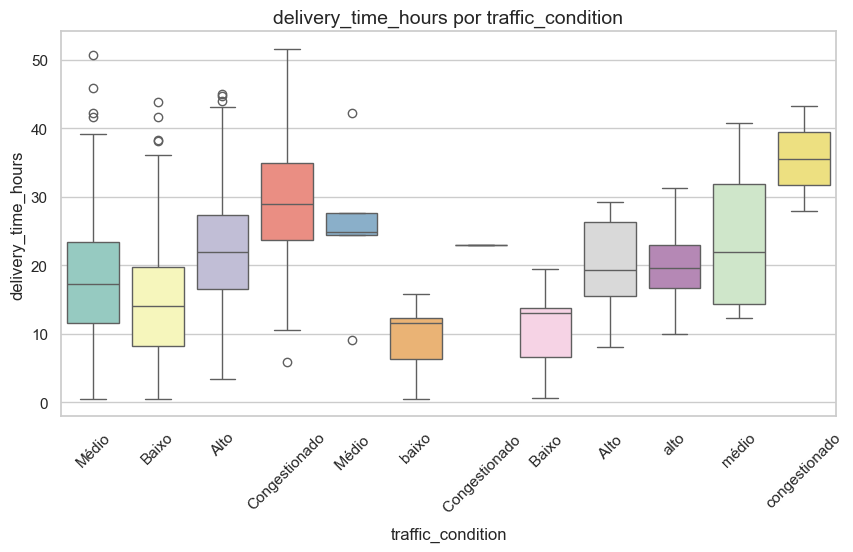

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


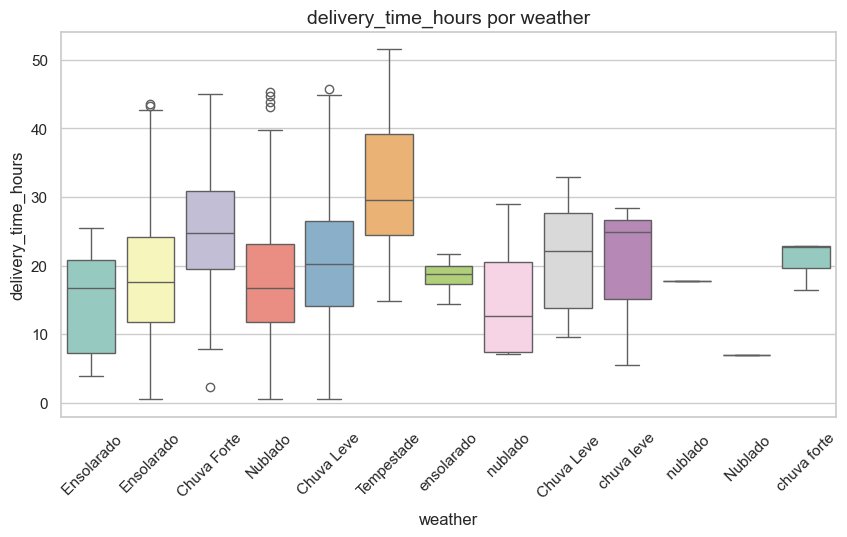

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


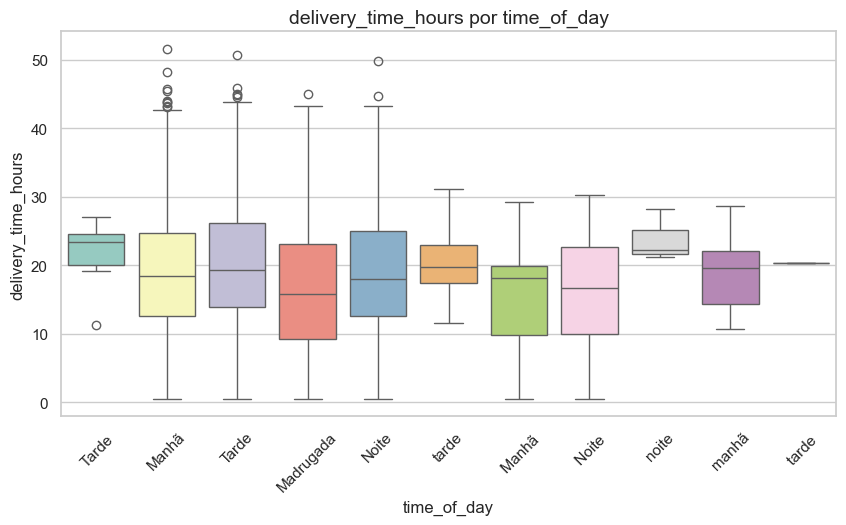

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


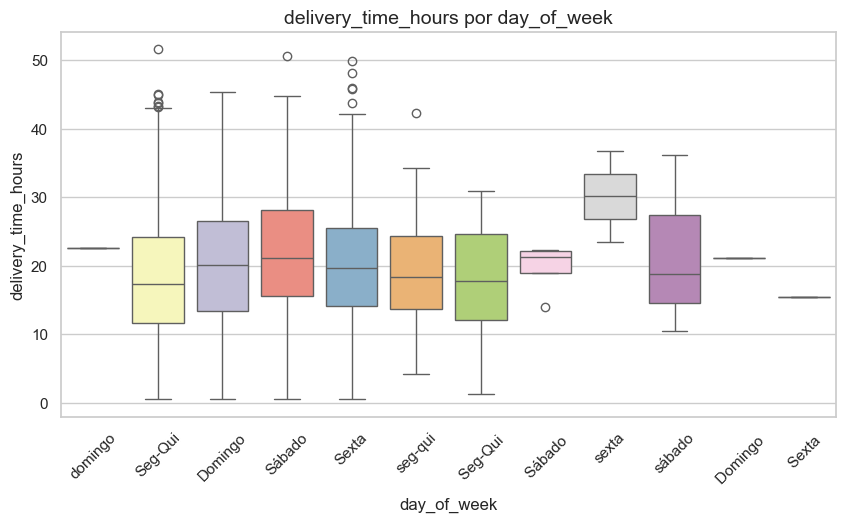

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


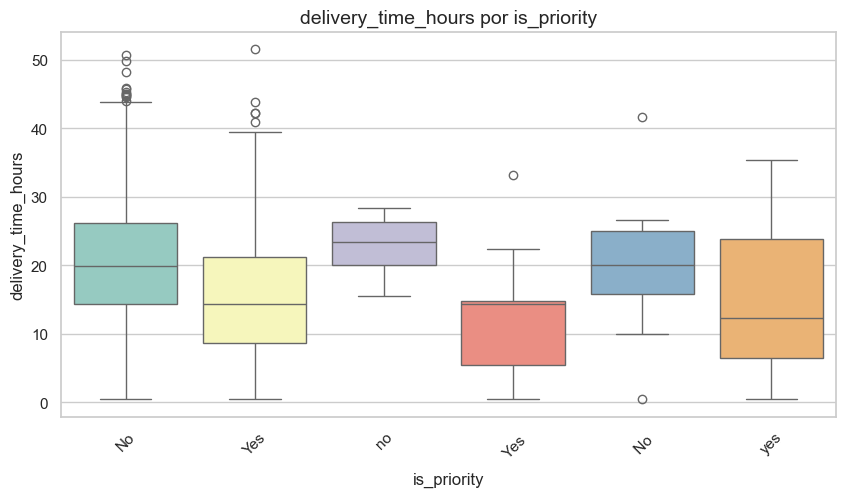

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


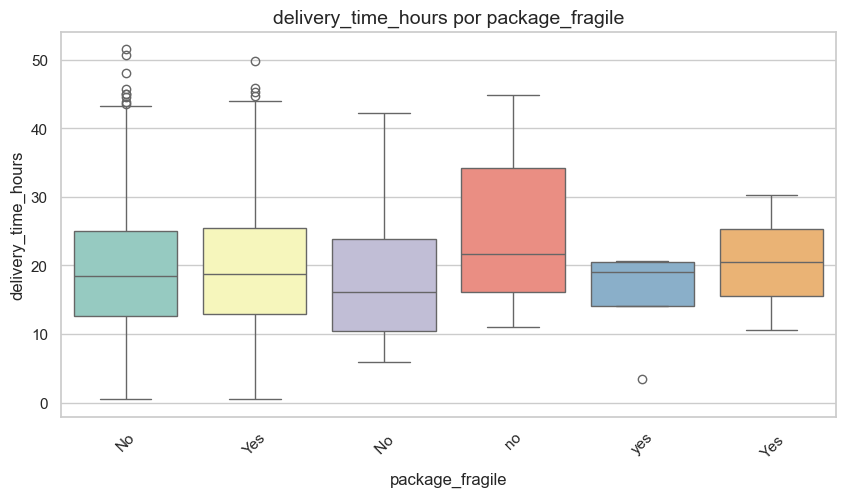

C:\Users\MV\AppData\Local\Temp\ipykernel_7568\2082951522.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set3')


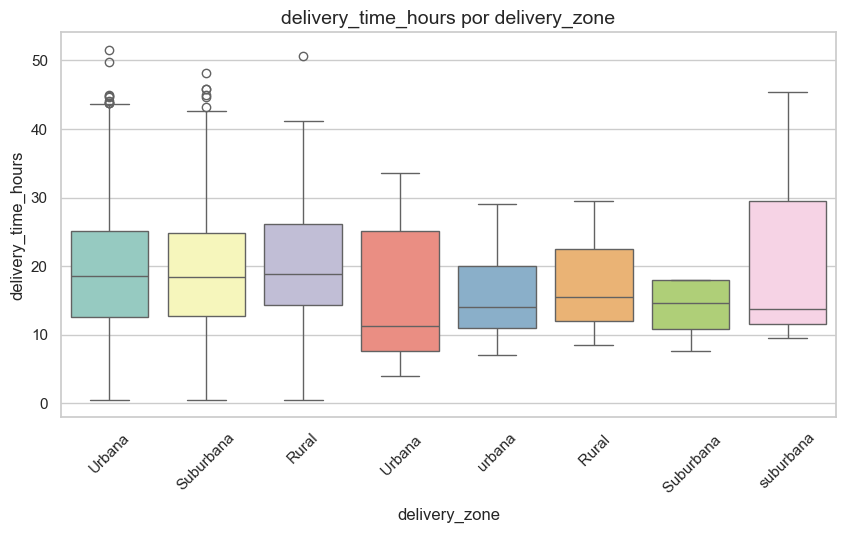

distance_km: 28 outliers encontrados.
package_weight_kg: 26 outliers encontrados.
driver_experience_years: 10 outliers encontrados.
num_stops: 66 outliers encontrados.
customer_rating: 15 outliers encontrados.
fuel_cost: 30 outliers encontrados.
delivery_time_hours: 17 outliers encontrados.

Resumo das Análises Realizadas:

Principais Descobertas:
- Tamanho do dataset: 2510 linhas e 17 colunas
- Variáveis numéricas: 7
- Variáveis categóricas: 10
- Valores faltantes: analisados
- Outliers: identificados, mas não tratados
- Variável alvo 'delivery_time' analisada quanto à normalidade e dispersão



In [1]:
# --------------------------------------------------------------
# 1. Importação de Bibliotecas
# --------------------------------------------------------------
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Adiciona a pasta raiz do projeto ao path (antes das importações locais)
sys.path.append(os.path.abspath('../'))

from scipy import stats
from src.data_preparation import load_data
from src.eda_utils import missing_summary, correlation_heatmap, detect_outliers_iqr


# Configurações de estilo
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.titlesize"] = 14

# --------------------------------------------------------------
# 2. Carregamento dos Dados
# --------------------------------------------------------------
df = load_data('../data/raw/delivery_time.csv')
df.head()

# --------------------------------------------------------------
# 3. Visão Geral do Dataset
# --------------------------------------------------------------
print("Dimensões:", df.shape)
print("\nTipos de Dados:\n", df.dtypes)
print("\nEstatísticas Descritivas:")
display(df.describe())

numeric_vars = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("\nVariáveis Numéricas:", numeric_vars)
print("Variáveis Categóricas:", categorical_vars)

# --------------------------------------------------------------
# 4. Análise de Valores Faltantes
# --------------------------------------------------------------
missing_summary(df)

# --------------------------------------------------------------
# 5. Análise da Variável Alvo: delivery_time
# --------------------------------------------------------------
target = 'delivery_time_hours'

sns.histplot(df[target], kde=True, color='dodgerblue')
plt.title("Distribuição do Tempo de Entrega")
plt.xlabel("Tempo de Entrega (minutos)")
plt.show()

sns.boxplot(x=df[target], color='orange')
plt.title("Boxplot - Tempo de Entrega")
plt.show()

print("\nEstatísticas Descritivas da Variável Alvo:")
display(df[target].describe())

# Teste de normalidade
shapiro_test = stats.shapiro(df[target].dropna())
print("\nShapiro-Wilk Test:", shapiro_test)
print("Distribuição é normal?", "Sim ✅" if shapiro_test.pvalue > 0.05 else "Não ❌")

# --------------------------------------------------------------
# 6. Análise Univariada - Variáveis Numéricas
# --------------------------------------------------------------
for col in numeric_vars:
    if col != target:
        print(f"\n🔹 {col}")
        display(df[col].describe())
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f"Distribuição de {col}")
        plt.show()
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f"Boxplot de {col}")
        plt.show()
        detect_outliers_iqr(df, col)

# --------------------------------------------------------------
# 7. Análise Univariada - Variáveis Categóricas
# --------------------------------------------------------------
for col in categorical_vars:
    print(f"\n {col}")
    print(df[col].value_counts())
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Distribuição de {col}")
    plt.xticks(rotation=45)
    plt.show()

# --------------------------------------------------------------
# 8. Análise de Correlações
# --------------------------------------------------------------
correlation_heatmap(df, target=target)

# --------------------------------------------------------------
# 9. Análise Bivariada (Categóricas vs Target)
# --------------------------------------------------------------
for col in categorical_vars:
    sns.boxplot(x=col, y=target, data=df, palette='Set3')
    plt.title(f"{target} por {col}")
    plt.xticks(rotation=45)
    plt.show()

# --------------------------------------------------------------
# 10. Identificação de Outliers
# --------------------------------------------------------------
for col in numeric_vars:
    detect_outliers_iqr(df, col)

# --------------------------------------------------------------
# 11. Conclusões e Descobertas
# --------------------------------------------------------------
print("\nResumo das Análises Realizadas:")

print(f"""
Principais Descobertas:
- Tamanho do dataset: {df.shape[0]} linhas e {df.shape[1]} colunas
- Variáveis numéricas: {len(numeric_vars)}
- Variáveis categóricas: {len(categorical_vars)}
- Valores faltantes: analisados
- Outliers: identificados, mas não tratados
- Variável alvo 'delivery_time' analisada quanto à normalidade e dispersão
""")



In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def show_basic_info(df):
    """Mostra informações gerais e valores nulos"""
    print("Dimensões do dataset:", df.shape)
    print("\nValores nulos por coluna:\n", df.isnull().sum())
    print("\nTipos de dados:\n", df.dtypes)


def plot_top_graphs(df, target='delivery_time_hours'):
    """Gera apenas 4 gráficos principais e bem escolhidos"""

    plt.figure(figsize=(12, 4))
    sns.histplot(df[target], kde=True)
    plt.title("Distribuição do Tempo de Entrega (Target)")
    plt.show()

    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df['distance_km'])
    plt.title("Boxplot da Distância")
    plt.show()

    plt.figure(figsize=(12, 4))
    sns.scatterplot(x='distance_km', y=target, data=df)
    plt.title("Relação entre Distância e Tempo de Entrega")
    plt.show()

    plt.figure(figsize=(10, 6))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Mapa de Correlação")
    plt.show()

df = pd.read_csv('../data/raw/delivery_time.csv')
plot_top_graphs(df)

